In [1]:
%matplotlib inline
from matplotlib import style

# To replicate the style of the graphs from FiveThirtyEight.com.
style.use('fivethirtyeight')

import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Setting up the database engine for the flask application
# which allows us to access and query the SQLlite database
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model / transfer the contents of the 
# database into a different structure of data
Base = automap_base()


# reflect the tables
# reflect the schema of our SQLite tables into our code and create mappings.
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
# Our session essentially allows us to query for data
session = Session(engine)

# Exploratory Climate Analysis

The datetime dependency has a function called **dt.date()**, which specifies the date in the following format: year, month, day.

The **dt.timedelta()** function allows us to trace back a certain number of days.

In [10]:
# Date from the previous year
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(prev_year)

# Variable that stores results of our query
results = []

2016-08-23


In [11]:
# Storing a variable which contains access to a session in which we can 
# slectively create queries to a sqLlight database and its columns/dimmen.
results = session.query(Measurement.date, Measurement.prcp)

In [12]:
# returns all the data in the seesion we are looking at
(results.all())

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [13]:
# Filtering our results to only see the filtered dates
results = session.query(
Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()


results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Creating a pandas dataframe with the data we pulled
df = pd.DataFrame(results, columns=['date','precipitation'])
df

# Setting the date column to be the index - inplace function to drop index row
df.set_index(df['date'], inplace=True)

df

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


In [15]:
# Because there are two 'date' columns - we will be printing the data from now
# To print it - we weill be changing the the df to string and dropping index
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

In [16]:
# Sorting the df data by its date
df = df.sort_index()
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

<AxesSubplot:xlabel='date'>

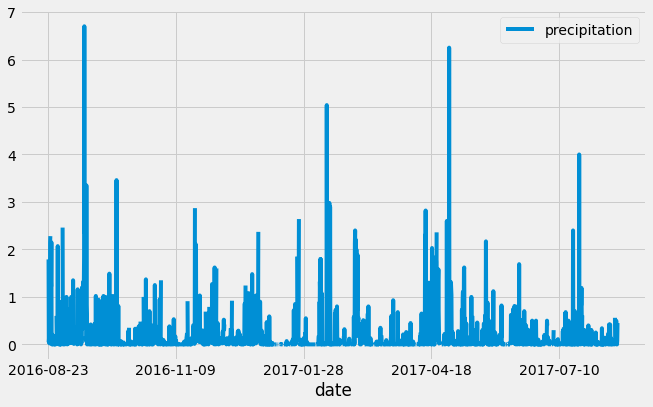

In [17]:
# Graphing the plot
df.plot(figsize = (10,6))

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


**func.count** counts a given dataset we are interested in.

In [19]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9,)]

In [20]:
# Printing out the station ID, station count(determines how active)
# grouping by station
# Ordering by station count in descending order
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())\
.all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Returns the minimum temp, max temp, avg temp
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), 
              func.avg(Measurement.tobs)).all()



[(53.0, 87.0, 73.09795396419437)]

In [22]:
# Looking for a specific station's data using filter
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), 
              func.avg(Measurement.tobs)).filter(
              Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [23]:
# we are pulling all the temp data from a specific station after the prev year
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

results

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [24]:
# Putting the information into a dataframe
df2 = pd.DataFrame(results, columns=['tobs'])
print(df2.to_string(index=False))

 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

<AxesSubplot:ylabel='Frequency'>

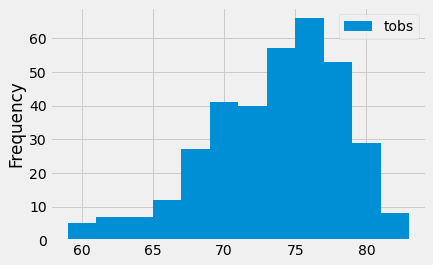

In [25]:
# Bin indicates how many boxes will show
df2.plot.hist(bins=12)

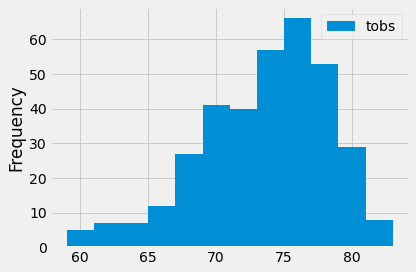

In [26]:
df2.plot.hist(bins=12)

# Compresses the x-axis labels so they fit into the box holding our plot
plt.tight_layout()

- Looking at this plot, we can infer that a vast majority of the observations were over 67 degrees

- about 325 days where it was over 67 degrees when the temperature was observed

